Vamos a cargar el dataset de AirBnB descargado de [aquí](https://public.opendatasoft.com/explore/dataset/airbnb-listings/export/?disjunctive.host_verifications&disjunctive.amenities&disjunctive.features&q=Madrid&dataChart=eyJxdWVyaWVzIjpbeyJjaGFydHMiOlt7InR5cGUiOiJjb2x1bW4iLCJmdW5jIjoiQ09VTlQiLCJ5QXhpcyI6Imhvc3RfbGlzdGluZ3NfY291bnQiLCJzY2llbnRpZmljRGlzcGxheSI6dHJ1ZSwiY29sb3IiOiJyYW5nZS1jdXN0b20ifV0sInhBeGlzIjoiY2l0eSIsIm1heHBvaW50cyI6IiIsInRpbWVzY2FsZSI6IiIsInNvcnQiOiIiLCJzZXJpZXNCcmVha2Rvd24iOiJyb29tX3R5cGUiLCJjb25maWciOnsiZGF0YXNldCI6ImFpcmJuYi1saXN0aW5ncyIsIm9wdGlvbnMiOnsiZGlzanVuY3RpdmUuaG9zdF92ZXJpZmljYXRpb25zIjp0cnVlLCJkaXNqdW5jdGl2ZS5hbWVuaXRpZXMiOnRydWUsImRpc2p1bmN0aXZlLmZlYXR1cmVzIjp0cnVlfX19XSwidGltZXNjYWxlIjoiIiwiZGlzcGxheUxlZ2VuZCI6dHJ1ZSwiYWxpZ25Nb250aCI6dHJ1ZX0%3D&location=16,41.38377,2.15774&basemap=jawg.streets)

![](descargar.png)

In [1]:
airbnb<-read.csv('airbnb-listings.csv',sep = ';')
options(repr.plot.height=4,repr.plot.width=6,repr.plot.res = 300)

Vamos a quedarnos con las columnas de mayor interés:

'City','Room.Type','Neighbourhood','Accommodates','Bathrooms','Bedrooms','Beds','Price','Square.Feet','Guests.Included','Extra.People','Review.Scores.Rating','Latitude', 'Longitude'

In [2]:
airbnb <- airbnb[,c('City','Room.Type','Neighbourhood','Accommodates','Bathrooms','Bedrooms','Beds','Price','Square.Feet','Guests.Included','Extra.People','Review.Scores.Rating','Latitude', 'Longitude')]
head(airbnb)

,City,Room.Type,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude
,<chr>,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
1,London,Entire home/apt,,1,1.0,1,1,50,NA,1,20,90,51.49247,-0.1886284
2,London,Entire home/apt,LB of Richmond upon Thames,8,2.5,5,5,175,NA,6,25,87,51.48200,-0.2392775
3,London,Entire home/apt,,2,1.0,1,1,155,NA,1,0,NA,51.51579,-0.1363321
4,Madrid,Private room,Palacio,2,1.0,1,1,36,NA,1,0,98,40.41011,-3.7147540
5,Madrid,Entire home/apt,Palacio,2,1.0,1,1,85,NA,1,0,95,40.41697,-3.7094389
6,Madrid,Private room,La Latina,2,1.0,1,1,20,861,1,10,91,40.40971,-3.7135612


Nos quedarmos solo con las entradas de Madrid para Room.Type=="Entire home/apt" y cuyo barrio (Neighbourhood) no está vacio ''
Podemos eliminar las siguientes columnas que ya no son necesarias:
"Room.Type",'City'

Llama a nuevo dataframe df_madrid.

In [3]:
df_madrid <- airbnb[airbnb$Room.Type=="Entire home/apt" & airbnb$City=="Madrid" & airbnb$Neighbourhood!="",c('Neighbourhood','Accommodates','Bathrooms','Bedrooms','Beds','Price','Square.Feet','Guests.Included','Extra.People','Review.Scores.Rating','Latitude', 'Longitude')]
head(df_madrid)

,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude
,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
5,Palacio,2,1,1,1,85,NA,1,0,95,40.41697,-3.709439
7,Malasaña,4,1,1,2,112,NA,2,5,99,40.42319,-3.711249
8,Palacio,8,3,3,4,190,NA,6,40,96,40.41651,-3.717843
12,La Latina,2,1,1,1,71,NA,1,0,90,40.41200,-3.706691
14,Embajadores,2,NA,1,NA,34,NA,1,6,88,40.40809,-3.700322
15,Embajadores,3,1,0,2,60,NA,1,0,100,40.41085,-3.701099


Crea una nueva columna llamada Square.Meters a partir de Square.Feet. Recuerda que un pie cuadrado son 0.092903 metros cuadrados.

In [4]:
df_madrid$Square.Feet <- df_madrid$Square.Feet*0.092903
colnames(df_madrid)[7] <- "Square.Meters"
head(df_madrid)

,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Meters,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude
,<chr>,<int>,<dbl>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>
5,Palacio,2,1,1,1,85,NA,1,0,95,40.41697,-3.709439
7,Malasaña,4,1,1,2,112,NA,2,5,99,40.42319,-3.711249
8,Palacio,8,3,3,4,190,NA,6,40,96,40.41651,-3.717843
12,La Latina,2,1,1,1,71,NA,1,0,90,40.41200,-3.706691
14,Embajadores,2,NA,1,NA,34,NA,1,6,88,40.40809,-3.700322
15,Embajadores,3,1,0,2,60,NA,1,0,100,40.41085,-3.701099


¿Que porcentaje de los apartamentos no muestran los metros cuadrados? Es decir, ¿cuantos tienen NA en Square.Meters?

In [5]:
library(plyr)
library(dplyr)
filter(df_madrid, is.na(Square.Meters) == TRUE) |> select(Square.Meters) |> nrow() -> apart_m2_na
porcentaje_apart_m2_na <- round (apart_m2_na/nrow(df_madrid)*100, 2)
paste("El porcentaje de piso sin metro cuadrados es de:", porcentaje_apart_m2_na, "%")


Attaching package: ‘dplyr’


The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




[1] "El porcentaje de piso sin metro cuadrados es de: 93.8 %"

De todos los apartamentos que tienen un valor de metros cuadrados diferente de NA 
¿Que porcentaje de los apartamentos tienen 0 metros cuadrados?

In [6]:
filter(df_madrid, Square.Meters == 0) |> select(Square.Meters) |> nrow() -> apart_m2_0
porcentaje_apart_m2_0 <- round (apart_m2_0/nrow(df_madrid)*100, 2)
paste("El porcentaje de piso con 0 metro cuadrados es de:", porcentaje_apart_m2_0, "%")

[1] "El porcentaje de piso con 0 metro cuadrados es de: 2.29 %"

Reemplazar todos los 0m^2 por NA 

In [7]:
df_madrid$Square.Meters[df_madrid$Square.Meters == 0] <- NA

In [8]:
filter(df_madrid, Square.Meters == 0) |> select(Square.Meters) |> nrow() -> apart_m2_0
porcentaje_apart_m2_0 <- round (apart_m2_0/nrow(df_madrid)*100, 2)
paste("El porcentaje de piso con 0 metro cuadrados es de:", porcentaje_apart_m2_0, "%")
filter(df_madrid, is.na(Square.Meters) == TRUE) |> select(Square.Meters) |> nrow() -> apart_m2_na
porcentaje_apart_m2_na <- round (apart_m2_na/nrow(df_madrid)*100, 2)
paste("El porcentaje de piso sin metro cuadrados es de:", porcentaje_apart_m2_na, "%")

[1] "El porcentaje de piso con 0 metro cuadrados es de: 0 %"

[1] "El porcentaje de piso sin metro cuadrados es de: 96.09 %"

Son muchos, vamos a intentar crear un modelo que nos prediga cuantos son los metros cuadrados en función del resto de variables para tratar de rellenar esos NA. Pero **antes de crear el modelo** vamos a hacer:
* pintar el histograma de los metros cuadrados y ver si tenemos que filtrar algún elemento más.
* crearemos una variable sintética nueva basada en la similitud entre barrios que usaremos en nuestro modelo.

Pinta el histograma de los metros cuadrados y ver si tenemos que filtrar algún elemento más

Warning message:
“Use of `df_madrid$Square.Meters` is discouraged. Use `Square.Meters` instead.”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 5382 rows containing non-finite values (stat_bin).”


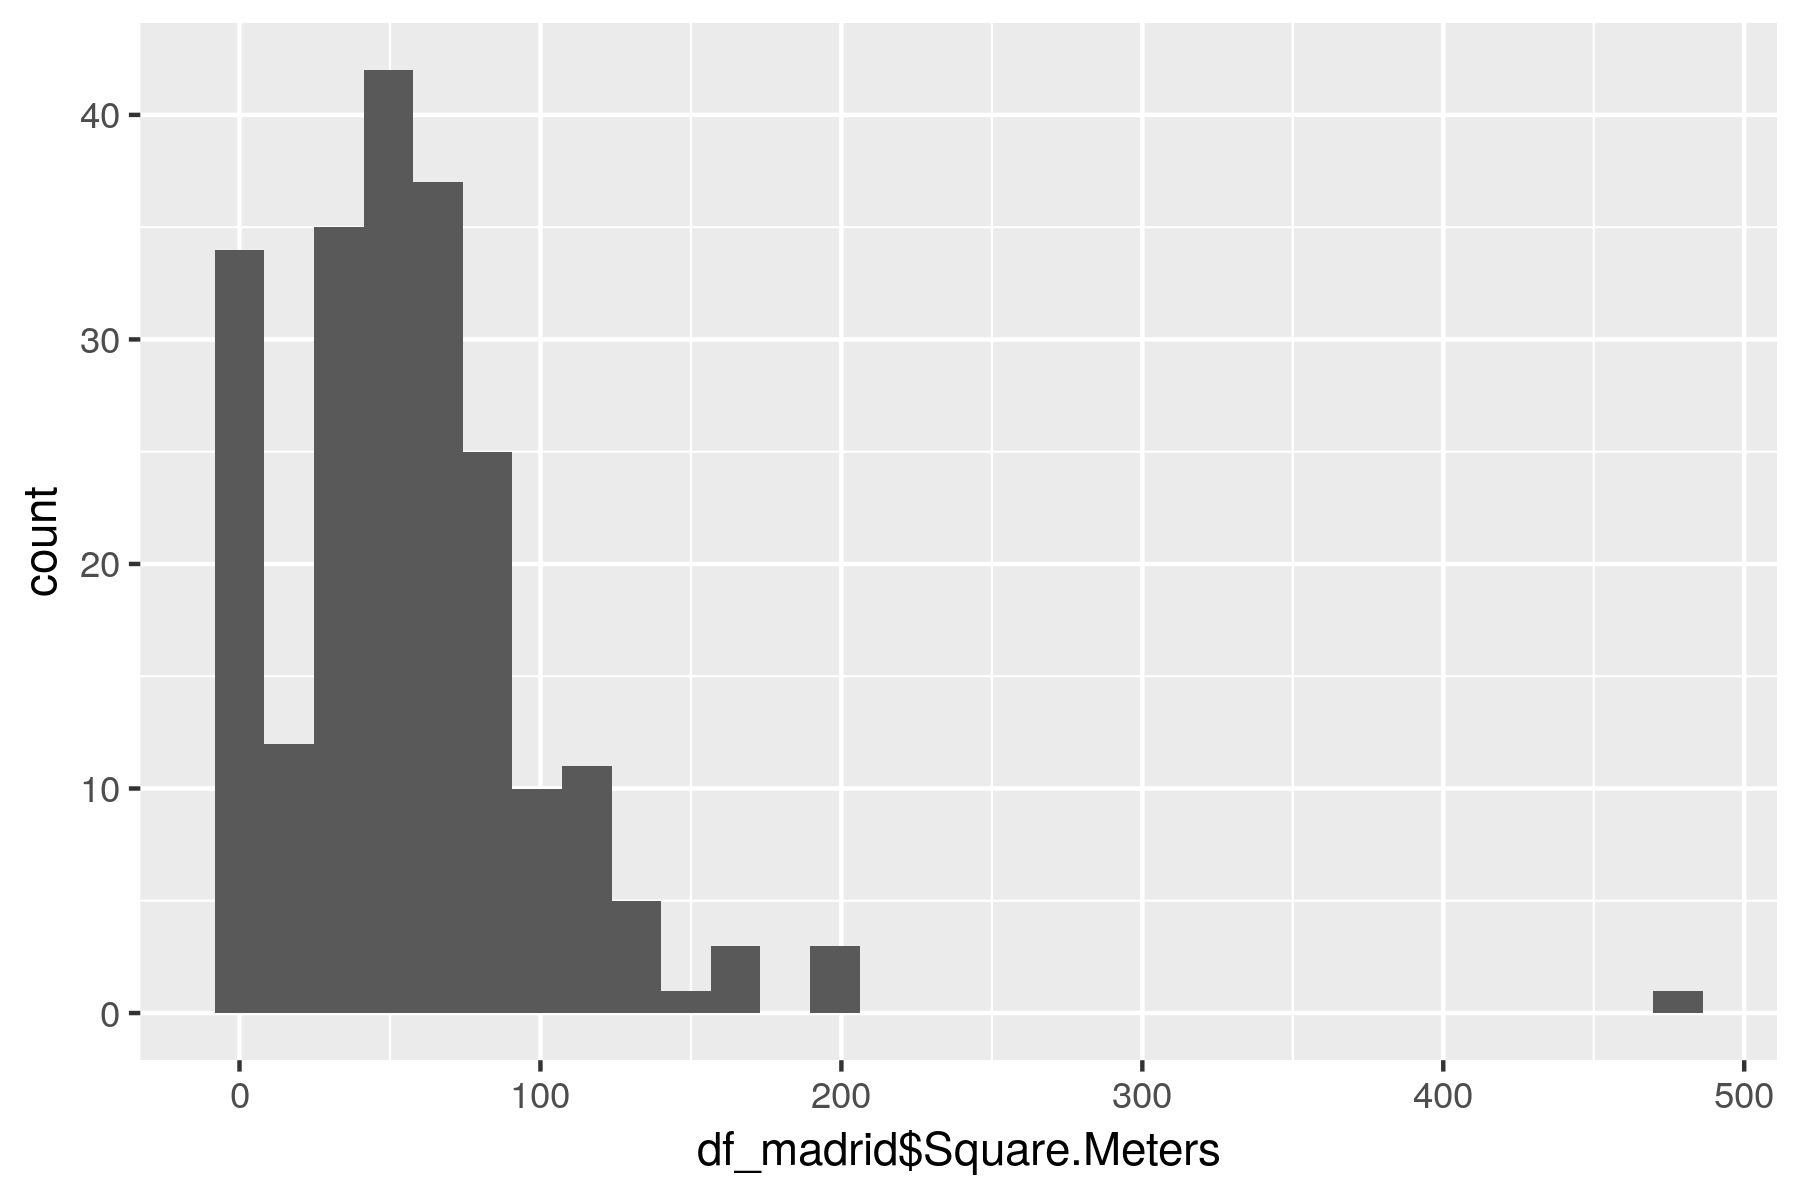

In [9]:
library(ggplot2)
ggplot(df_madrid, aes(x=df_madrid$Square.Meters))+geom_histogram()

Asigna el valor NA a la columna Square.Meters de los apartamentos que tengan menos de 20 m^2

In [10]:
df_madrid$Square.Meters[df_madrid$Square.Meters < 20] <- NA
unique(sort(df_madrid$Square.Meters))

[1]  22.01801  24.99091  27.03477  27.96380  30.00767  31.95863  35.02443
 [8]  36.04636  36.97539  37.99733  39.01926  40.04119  41.99216  44.03602
[15]  44.96505  49.98181  51.00375  52.02568  54.99858  56.02051  57.97147
[22]  60.01534  60.38695  65.03210  68.00500  69.95596  74.97272  79.98948
[29]  82.03335  85.00624  87.97914  90.02301  96.99073  99.96363 104.98039
[36] 108.04619 109.99715 115.01391 120.03068 124.95453 125.97647 134.98806
[43] 140.00482 150.03834 158.95703 159.97897 164.99573 200.02016 480.02980

Existen varios Barrios que todas sus entradas de Square.Meters son NA, vamos a eliminar del dataset todos los pisos que pertenecen a estos barrios.

In [11]:
nrow(filter(df_madrid, Square.Meters > 0)) -> apart_m2_n3
apart_m2_n3

[1] 174

In [12]:
head(df_madrid)

,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Meters,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude
,<chr>,<int>,<dbl>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>
5,Palacio,2,1,1,1,85,NA,1,0,95,40.41697,-3.709439
7,Malasaña,4,1,1,2,112,NA,2,5,99,40.42319,-3.711249
8,Palacio,8,3,3,4,190,NA,6,40,96,40.41651,-3.717843
12,La Latina,2,1,1,1,71,NA,1,0,90,40.41200,-3.706691
14,Embajadores,2,NA,1,NA,34,NA,1,6,88,40.40809,-3.700322
15,Embajadores,3,1,0,2,60,NA,1,0,100,40.41085,-3.701099


In [13]:
df_madrid |> group_by(Neighbourhood) |> 
summarise(no_na=length(na.omit(Square.Meters))) -> df_neigbourhood
df_neigbourhood <- df_neigbourhood[df_neigbourhood$no_na > 0,1]
list_df_neigbourhood <- c(df_neigbourhood)
df_madrid <- subset(df_madrid, df_madrid$Neighbourhood%in%list_df_neigbourhood$Neighbourhood==T)
df_madrid

,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Meters,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude
,<chr>,<int>,<dbl>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>
5,Palacio,2,1.0,1,1,85,NA,1,0,95,40.41697,-3.709439
7,Malasaña,4,1.0,1,2,112,NA,2,5,99,40.42319,-3.711249
8,Palacio,8,3.0,3,4,190,NA,6,40,96,40.41651,-3.717843
12,La Latina,2,1.0,1,1,71,NA,1,0,90,40.41200,-3.706691
14,Embajadores,2,NA,1,NA,34,NA,1,6,88,40.40809,-3.700322
15,Embajadores,3,1.0,0,2,60,NA,1,0,100,40.41085,-3.701099
16,La Latina,2,1.0,0,1,45,NA,1,0,87,40.40812,-3.710367
20,Embajadores,6,1.0,2,3,120,NA,6,30,100,40.41314,-3.705092
21,Embajadores,4,1.0,0,2,50,NA,2,8,86,40.40988,-3.702840


El barrio parece ser un indicador importante para los metros cuadrados de un apartamento.

Vamos a agrupar los barrios por metros cuadrados. Podemos usar una matriz de similaridad de Tukey tal y como hicimos en el curso de estadística:

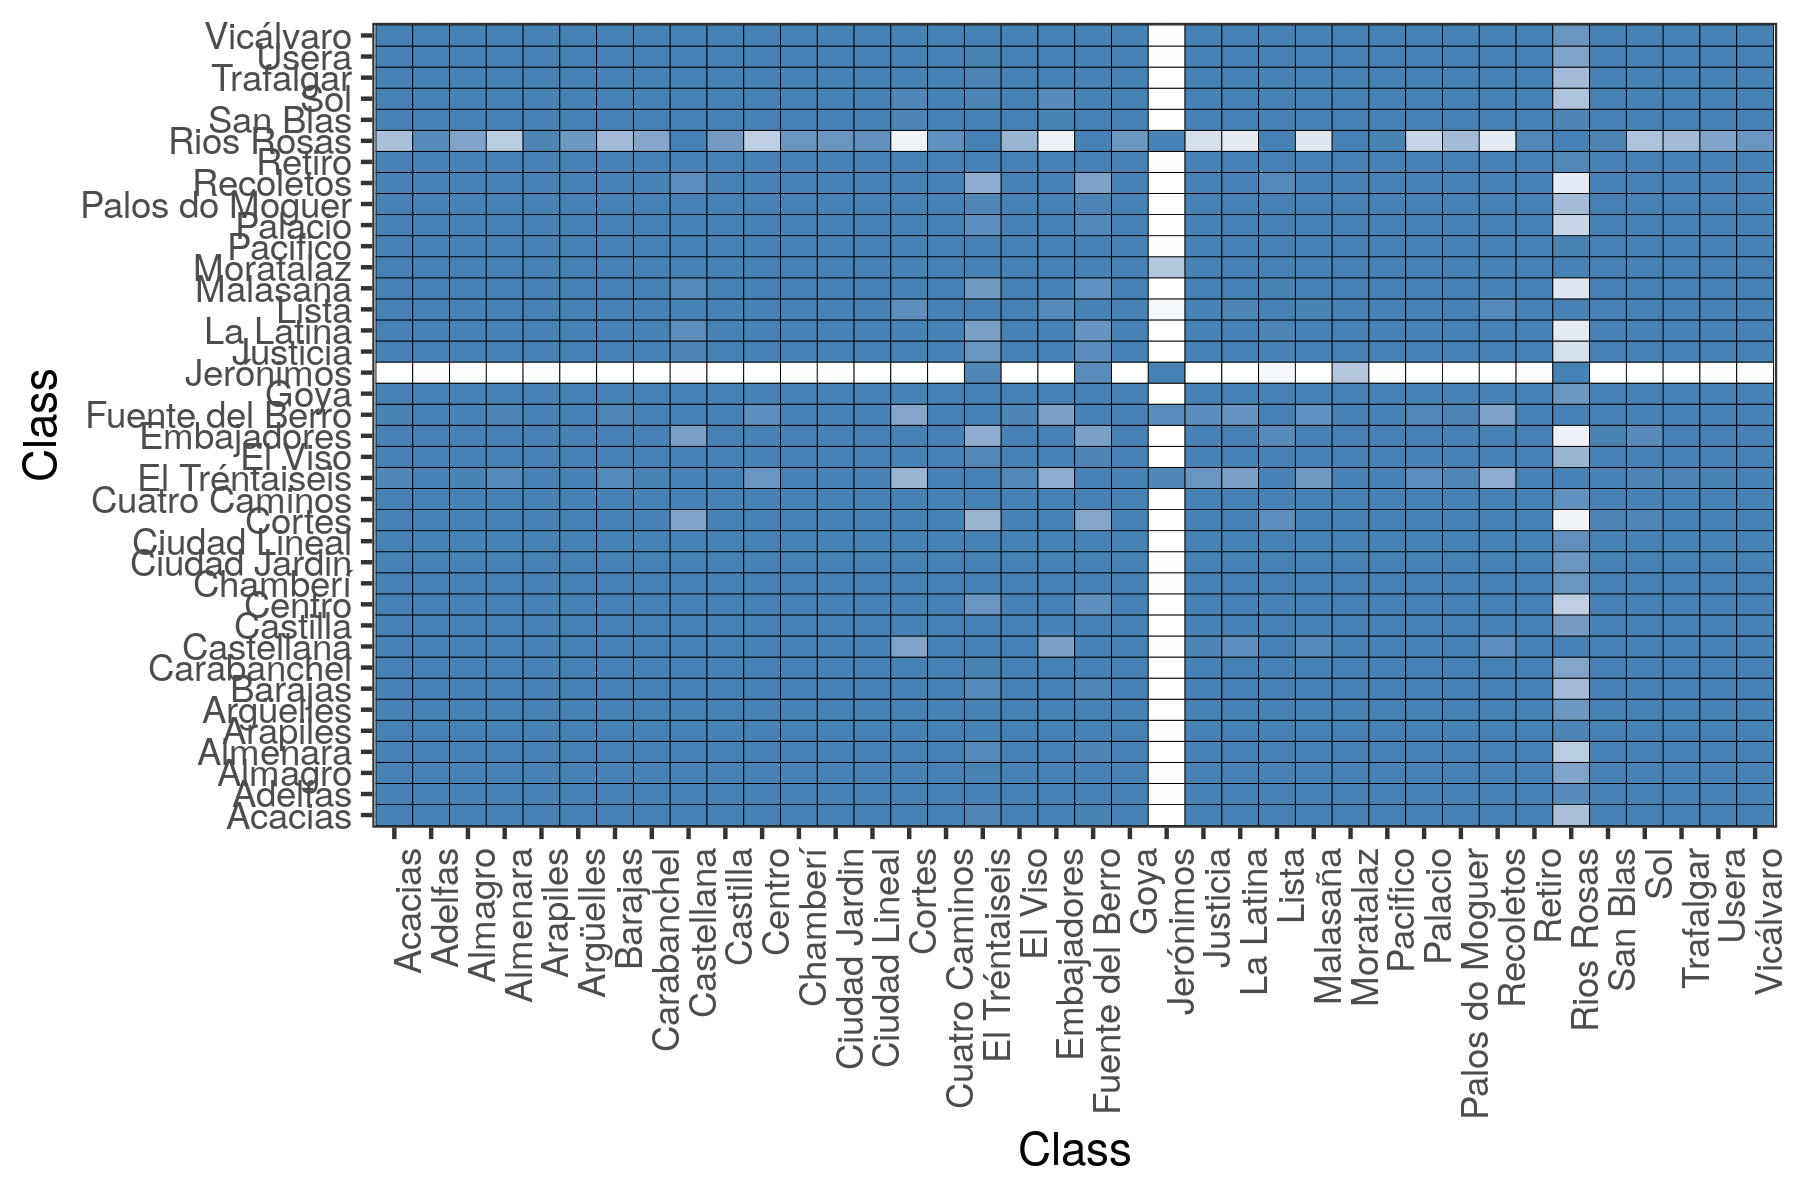

In [14]:
tky<-TukeyHSD(aov( formula=Square.Meters~Neighbourhood, data=df_madrid ))
tky.result<-data.frame(tky$Neighbourhood)
cn <-sort(unique(df_madrid$Neighbourhood))
resm <- matrix(NA, length(cn),length(cn))
rownames(resm) <- cn
colnames(resm) <- cn
resm[lower.tri(resm) ] <- round(tky.result$p.adj,4)
resm[upper.tri(resm) ] <- t(resm)[upper.tri(resm)] 
diag(resm) <- 1
library(ggplot2)
library(reshape2)
dfResm <- melt(resm)
ggplot(dfResm, aes(x=Var1, y=Var2, fill=value))+
  geom_tile(colour = "black")+
  scale_fill_gradient(low = "white",high = "steelblue")+
  ylab("Class")+xlab("Class")+theme_bw()+
  theme(axis.text.x = element_text(angle = 90, hjust = 1),legend.position="none")

Usando como variable de distancia: 1-resm
Dibuja un dendrograma de los diferentes barrios.



---------------------
Welcome to dendextend version 1.15.1
Type citation('dendextend') for how to cite the package.

Type browseVignettes(package = 'dendextend') for the package vignette.
The github page is: https://github.com/talgalili/dendextend/

Suggestions and bug-reports can be submitted at: https://github.com/talgalili/dendextend/issues
Or contact: <tal.galili@gmail.com>

	To suppress this message use:  suppressPackageStartupMessages(library(dendextend))
---------------------



Attaching package: ‘dendextend’


The following object is masked from ‘package:stats’:

    cutree




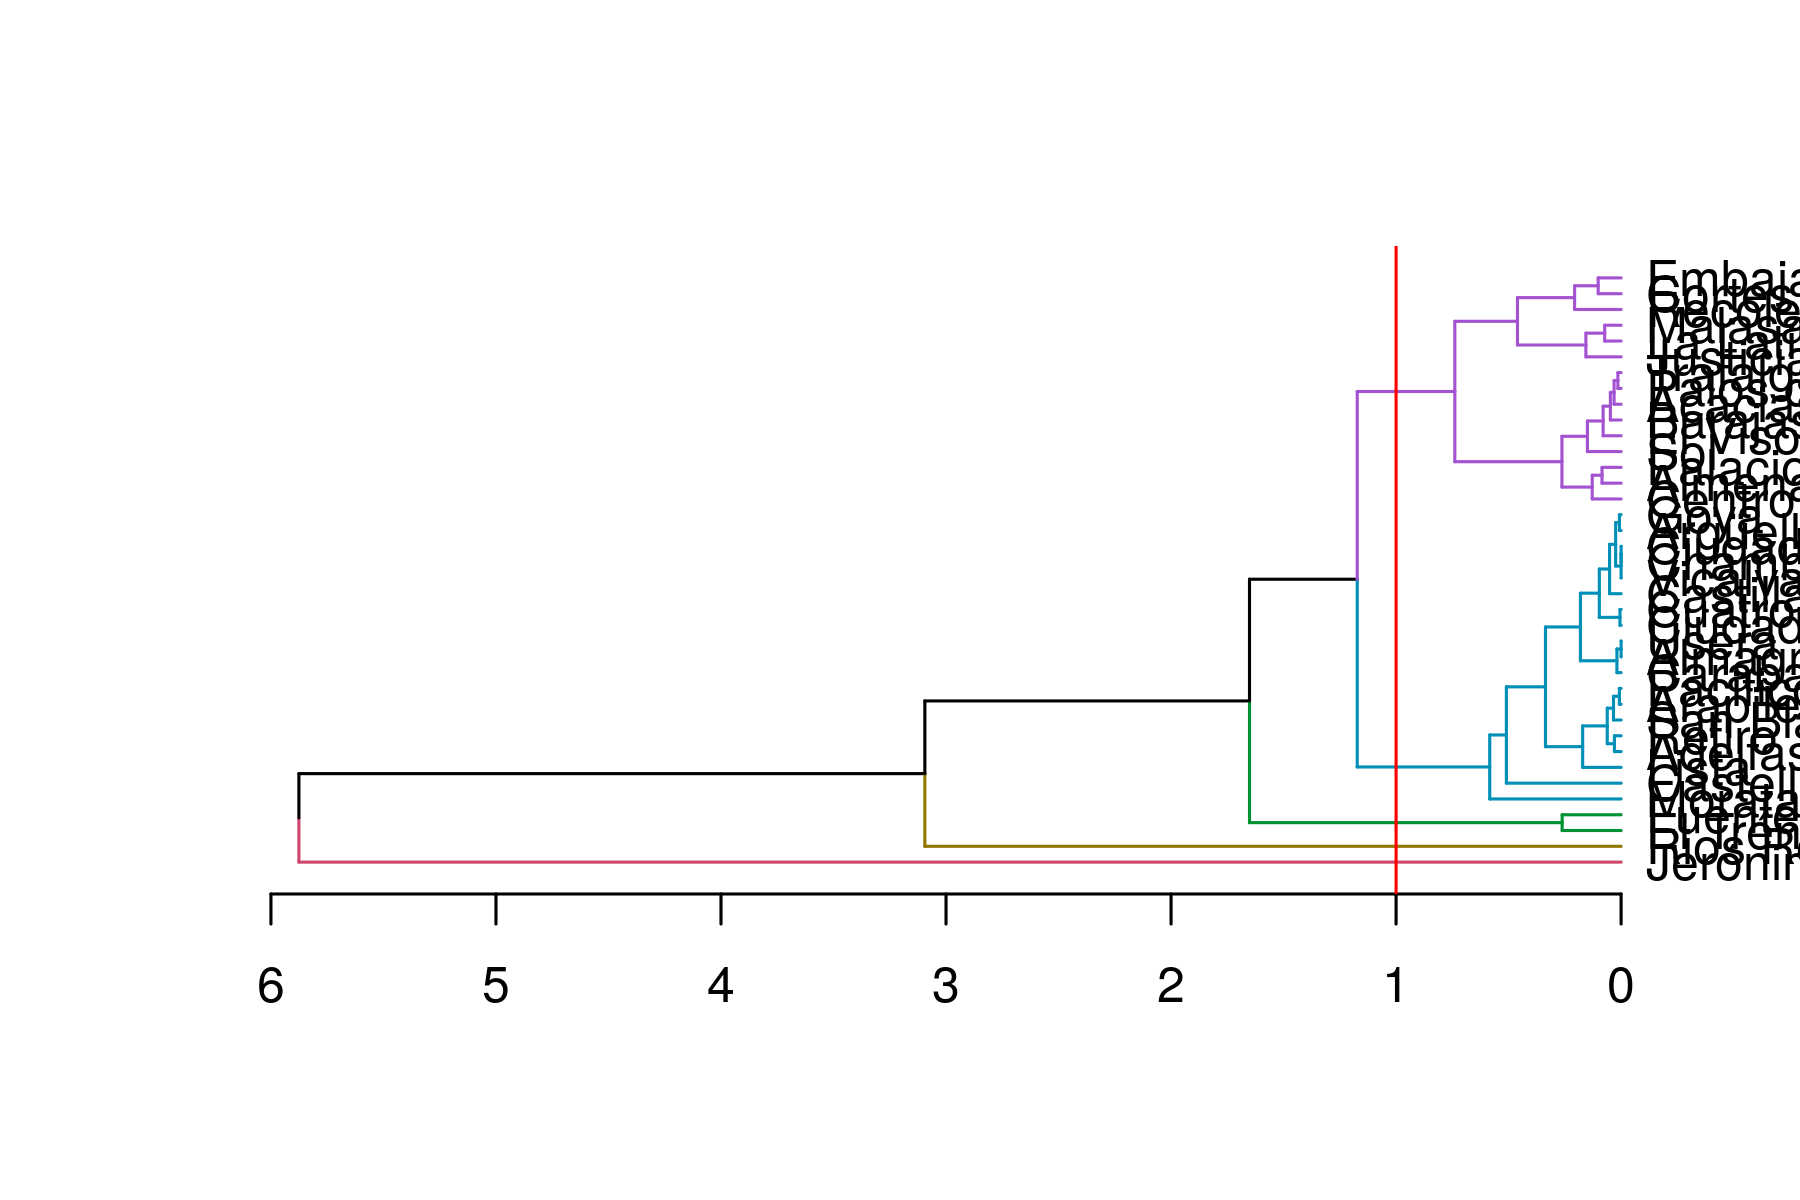

In [15]:
library(dendextend)
d <- dist(1-resm, method = "euclidean")
hc <- hclust(d, method="complete")
hcd <- as.dendrogram(hc)
max_dist <- 1
plot(color_branches(hcd,h=max_dist),horiz=TRUE,cex=0)
abline(v=max_dist,col="red")

¿Que punto de corte sería el aconsejable?, ¿cuantos clusters aparecen?

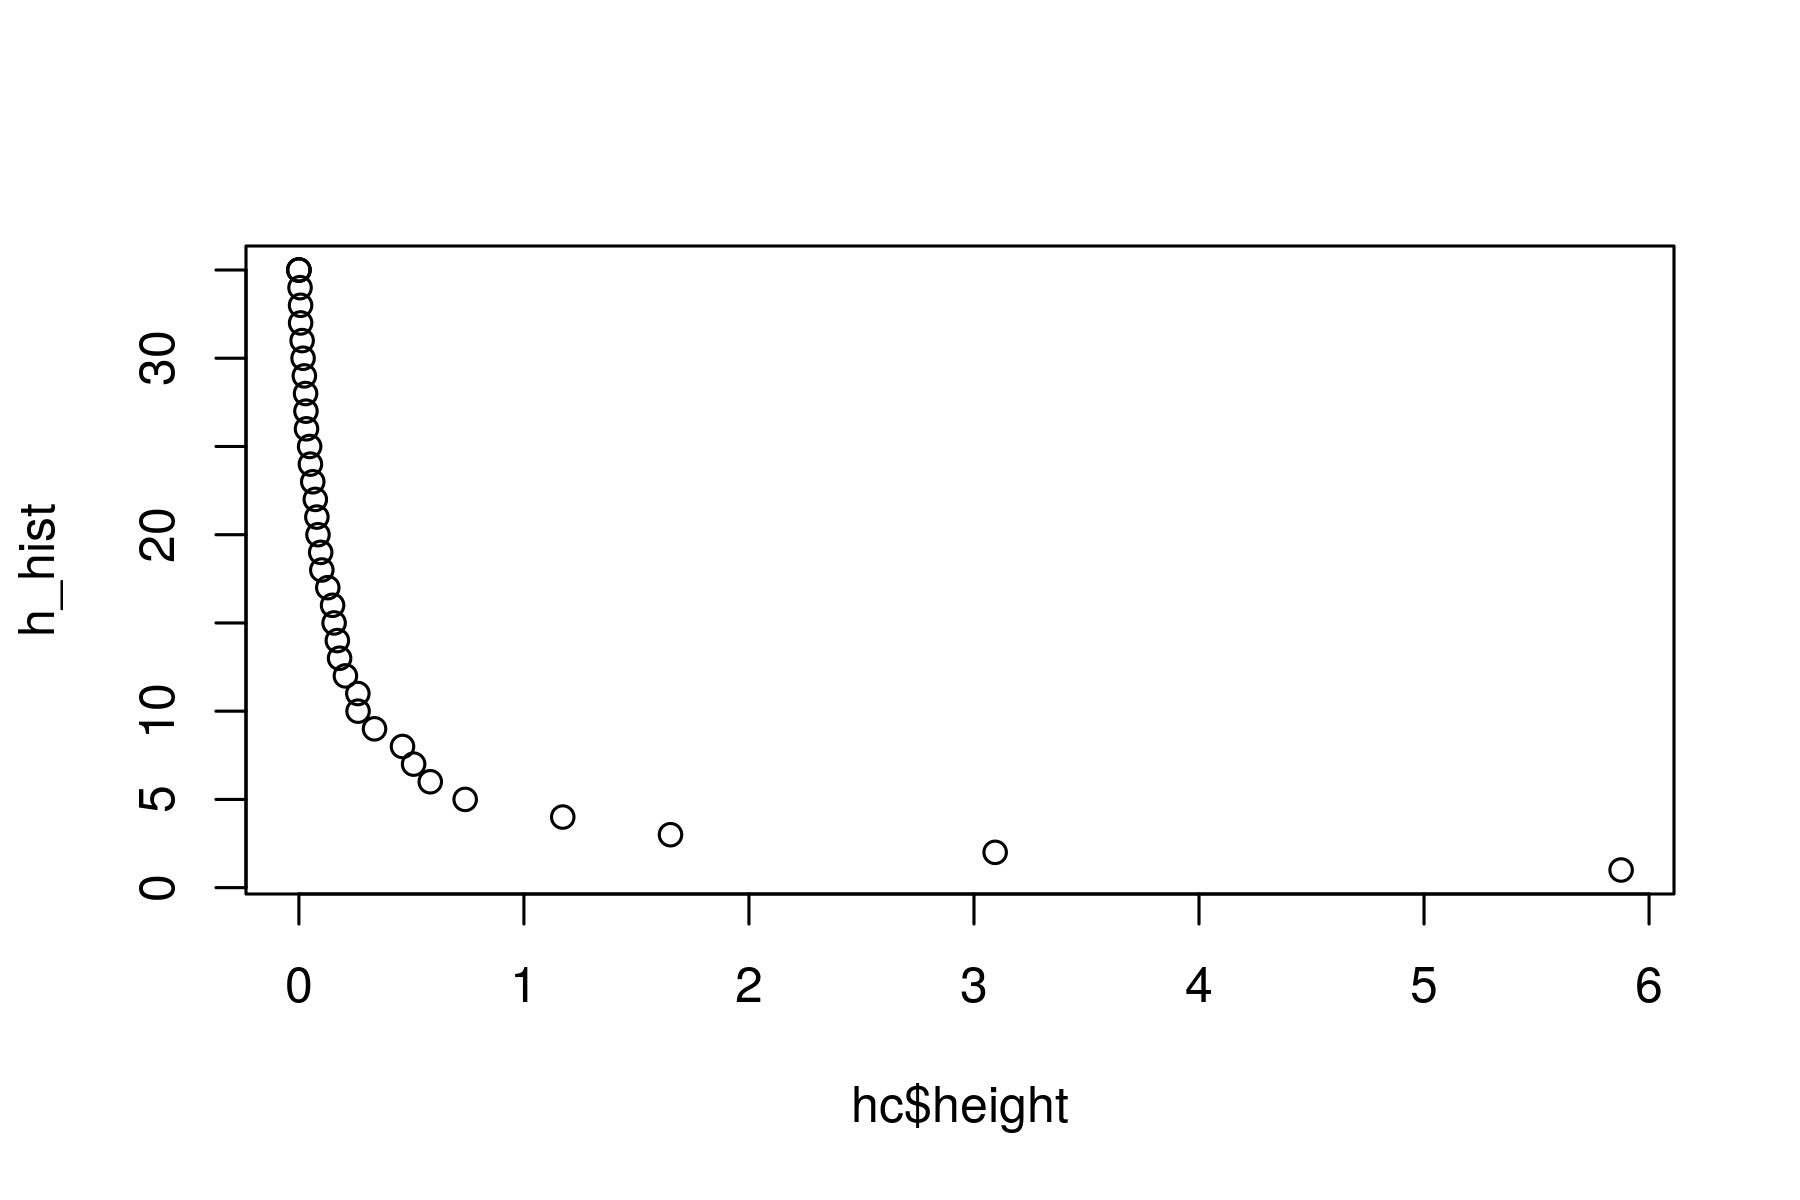

In [16]:
h_hist<-c()
for (h in hc$height){
    h_hist<-c(h_hist,max(cutree(hc,h=h)))
}
plot(hc$height,h_hist)

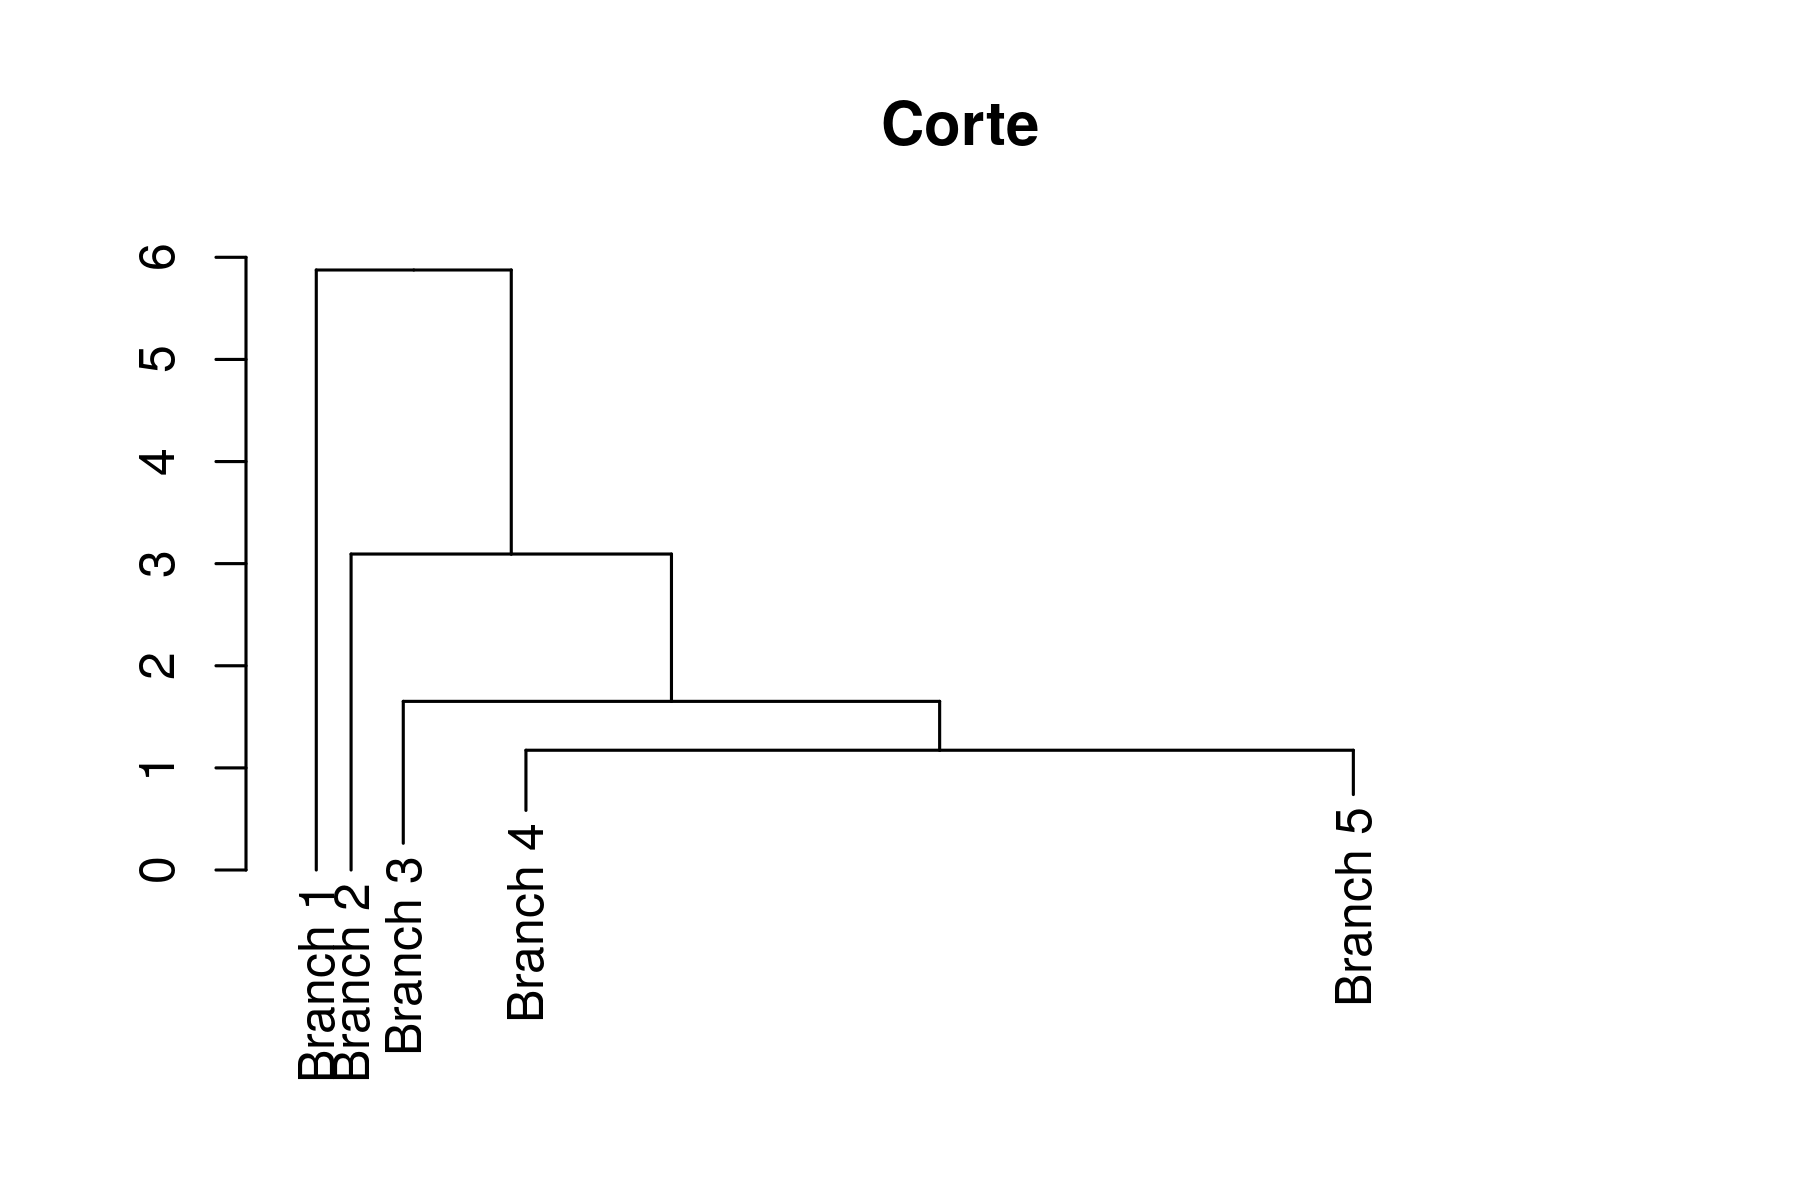

In [22]:
plot(cut(hcd, h = 1)$upper, main = "Corte", cex=1)

In [25]:
table(unique(df_madrid$Neighbourhood),cutree_1h.dendrogram(hcd,h=1))

                  
                   1 2 3 4 5
  Acacias          0 1 0 0 0
  Adelfas          0 0 0 0 1
  Almagro          1 0 0 0 0
  Almenara         0 1 0 0 0
  Arapiles         0 1 0 0 0
  Argüelles        1 0 0 0 0
  Barajas          1 0 0 0 0
  Carabanchel      0 1 0 0 0
  Castellana       0 1 0 0 0
  Castilla         0 1 0 0 0
  Centro           0 1 0 0 0
  Chamberí         1 0 0 0 0
  Ciudad Jardin    0 0 0 1 0
  Ciudad Lineal    0 1 0 0 0
  Cortes           0 1 0 0 0
  Cuatro Caminos   0 1 0 0 0
  El Tréntaiseis   0 1 0 0 0
  El Viso          0 0 1 0 0
  Embajadores      1 0 0 0 0
  Fuente del Berro 0 0 1 0 0
  Goya             1 0 0 0 0
  Jerónimos        1 0 0 0 0
  Justicia         0 1 0 0 0
  La Latina        0 1 0 0 0
  Lista            1 0 0 0 0
  Malasaña         0 1 0 0 0
  Moratalaz        0 1 0 0 0
  Pacifico         0 1 0 0 0
  Palacio          1 0 0 0 0
  Palos do Moguer  1 0 0 0 0
  Recoletos        1 0 0 0 0
  Retiro           0 1 0 0 0
  Rios Rosas       0 1 0

In [26]:
cluster_dendogram <- cutree(hc,h=1)

Respuesta: Si se marca el corte en 1, aparecen 5 cluster, 3 de ellos con bastantes barrios y dos cluster con uno o dos barrios muy singulares

Vamos a crear una nueva columna en el dataframe df_madrid con un nuevo identificador marcado por los clusters obtenidos. Esta columna la llamaremos neighb_id

In [27]:
df_madrid$neighb_id <- as.factor(cluster_dendogram[df_madrid$Neighbourhood])
head(df_madrid)

,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Meters,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,neighb_id
,<chr>,<int>,<dbl>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<fct>
5,Palacio,2,1,1,1,85,NA,1,0,95,40.41697,-3.709439,1
7,Malasaña,4,1,1,2,112,NA,2,5,99,40.42319,-3.711249,1
8,Palacio,8,3,3,4,190,NA,6,40,96,40.41651,-3.717843,1
12,La Latina,2,1,1,1,71,NA,1,0,90,40.41200,-3.706691,1
14,Embajadores,2,NA,1,NA,34,NA,1,6,88,40.40809,-3.700322,1
15,Embajadores,3,1,0,2,60,NA,1,0,100,40.41085,-3.701099,1


Vamos a crear dos grupos, uno test y otro train.

Tratamos de predecir los metros cuadrados en función del resto de columnas del dataframe.

In [28]:
set.seed(2)
df_madrid_no_na <- filter(df_madrid, Square.Meters > 20)
idx_df_madrid<-sample(1:nrow(df_madrid_no_na),0.7*nrow(df_madrid_no_na),)
train_df_madrid<-df_madrid_no_na[idx_df_madrid,]
test_df_madrid <-df_madrid_no_na[-idx_df_madrid,]

In [29]:
model <- lm(train_df_madrid, formula = Square.Meters~Accommodates+Bathrooms+Bedrooms+Beds+Price+Guests.Included+Extra.People+Review.Scores.Rating+Latitude+Longitude+neighb_id)
summary(model)


Call:
lm(formula = Square.Meters ~ Accommodates + Bathrooms + Bedrooms + 
    Beds + Price + Guests.Included + Extra.People + Review.Scores.Rating + 
    Latitude + Longitude + neighb_id, data = train_df_madrid)

Residuals:
    Min      1Q  Median      3Q     Max 
-50.393 -11.067   0.000   8.468  83.684 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -3.874e+03  5.726e+03  -0.677   0.5003    
Accommodates          2.022e+00  2.307e+00   0.877   0.3827    
Bathrooms             1.182e+01  5.788e+00   2.042   0.0438 *  
Bedrooms              1.569e+01  3.741e+00   4.195 5.96e-05 ***
Beds                 -8.648e-02  2.406e+00  -0.036   0.9714    
Price                 3.989e-02  3.018e-02   1.322   0.1893    
Guests.Included       4.049e-01  2.105e+00   0.192   0.8479    
Extra.People          4.906e-01  2.456e-01   1.997   0.0486 *  
Review.Scores.Rating  2.787e-01  2.361e-01   1.181   0.2406    
Latitude              9.412e+01  1.388

In [30]:
library(glmnet)
train_df_madrid2 <- na.omit(train_df_madrid)
model <- glmnet(as.matrix(train_df_madrid2[,c('neighb_id','Accommodates','Bathrooms','Bedrooms','Beds','Price','Guests.Included','Extra.People', 'Review.Scores.Rating', 'Latitude', 'Longitude')]),as.matrix(train_df_madrid2[,'Square.Meters']),lambda=2, alpha=1, standardize = F)
coefficients(model)

12 x 1 sparse Matrix of class "dgCMatrix"
                               s0
(Intercept)          -14.30075993
neighb_id              6.25826397
Accommodates           2.53559935
Bathrooms              7.62240741
Bedrooms              15.37169233
Beds                   .         
Price                  0.06151476
Guests.Included        .         
Extra.People           0.42143438
Review.Scores.Rating   0.23367012
Latitude               .         
Longitude              .         

In [31]:
new_model <- lm(train_df_madrid, formula = Square.Meters~Accommodates+Bathrooms+Bedrooms+Price+Extra.People+Review.Scores.Rating+neighb_id)
summary(new_model)


Call:
lm(formula = Square.Meters ~ Accommodates + Bathrooms + Bedrooms + 
    Price + Extra.People + Review.Scores.Rating + neighb_id, 
    data = train_df_madrid)

Residuals:
    Min      1Q  Median      3Q     Max 
-51.102 -11.167  -0.152   7.944  82.891 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -16.00130   21.18773  -0.755   0.4518    
Accommodates           2.13901    1.69098   1.265   0.2087    
Bathrooms             13.13132    5.12327   2.563   0.0118 *  
Bedrooms              15.20510    3.46557   4.387 2.78e-05 ***
Price                  0.04075    0.02824   1.443   0.1521    
Extra.People           0.47968    0.23997   1.999   0.0483 *  
Review.Scores.Rating   0.27000    0.22741   1.187   0.2378    
neighb_id2             9.13564    5.28739   1.728   0.0870 .  
neighb_id3            48.74859   20.63249   2.363   0.0200 *  
neighb_id4            -4.62627   20.78294  -0.223   0.8243    
neighb_id5            52.29870   

Mirad el histograma de los residuos sobre el conjunto de test para evaluar la calidad de vuestro modelo

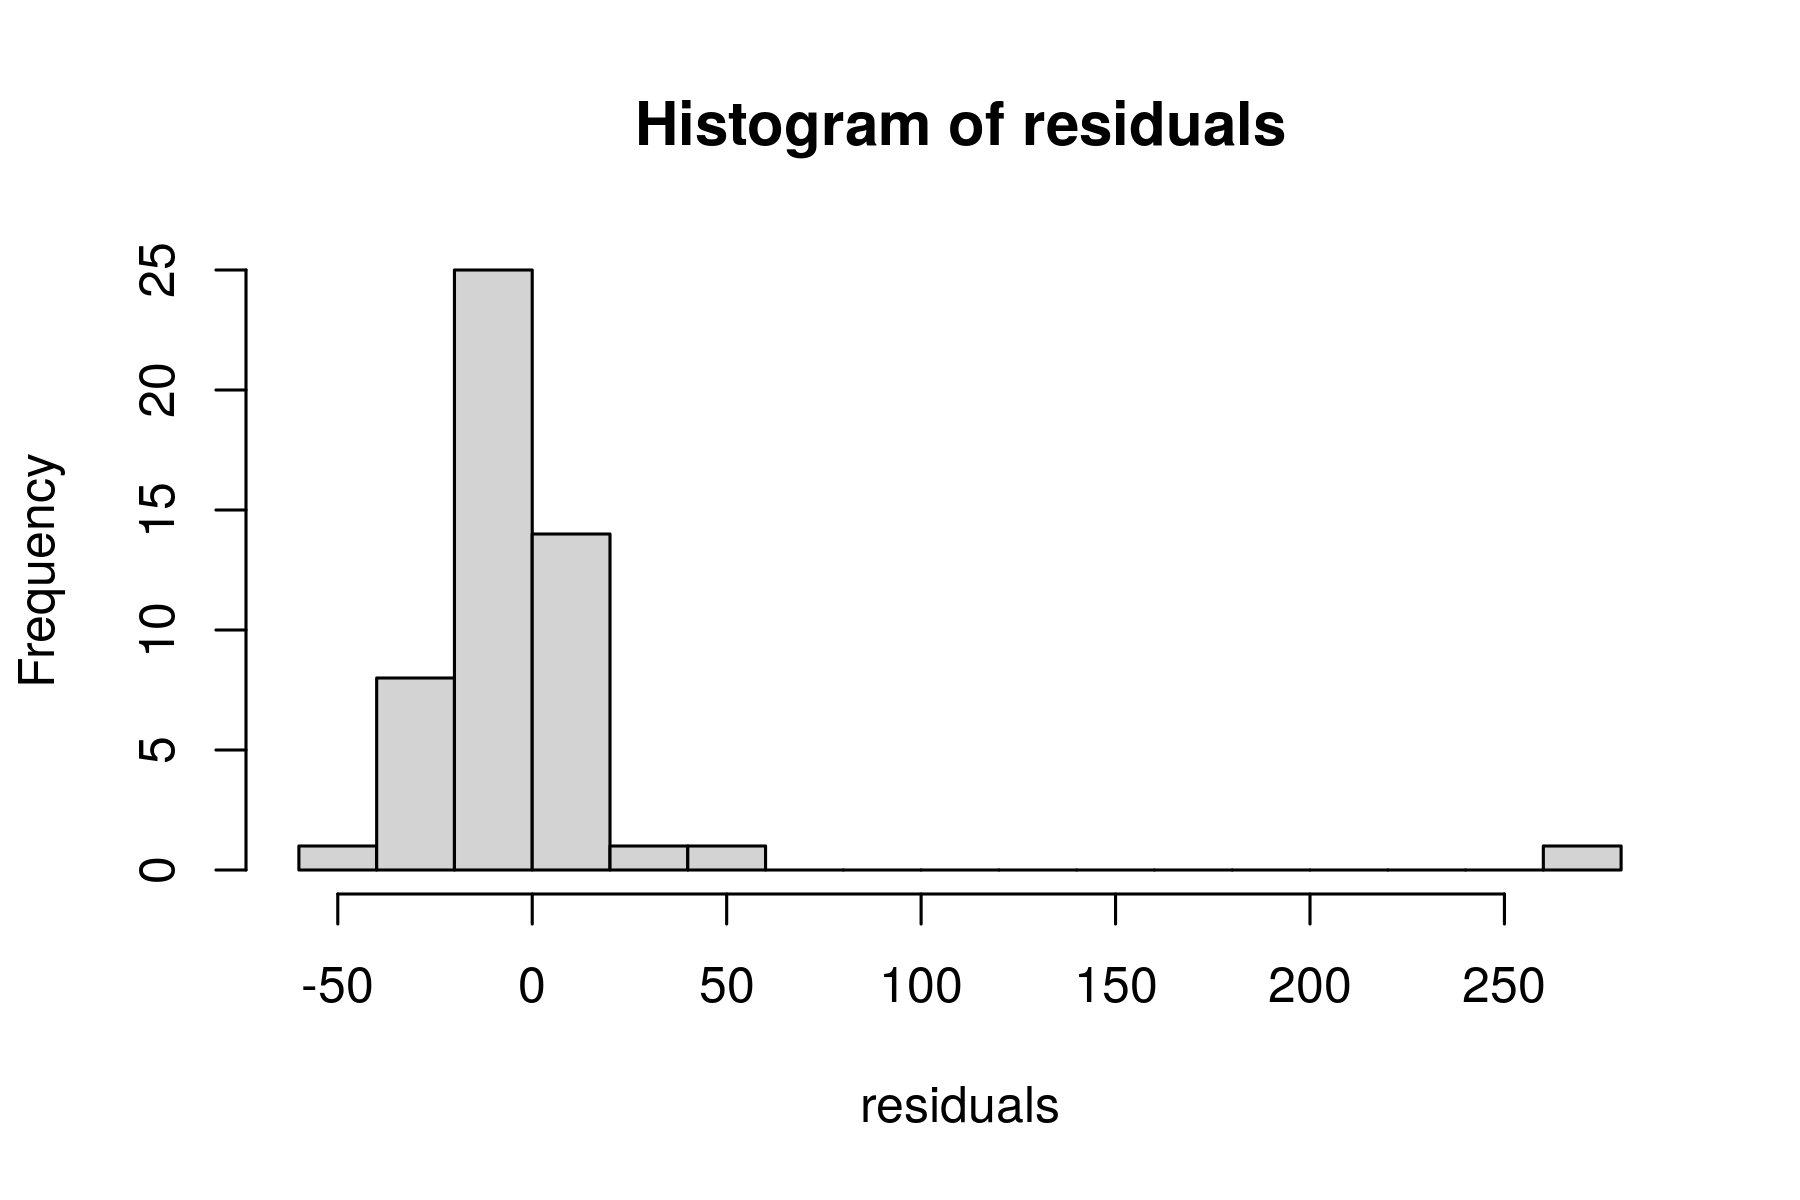

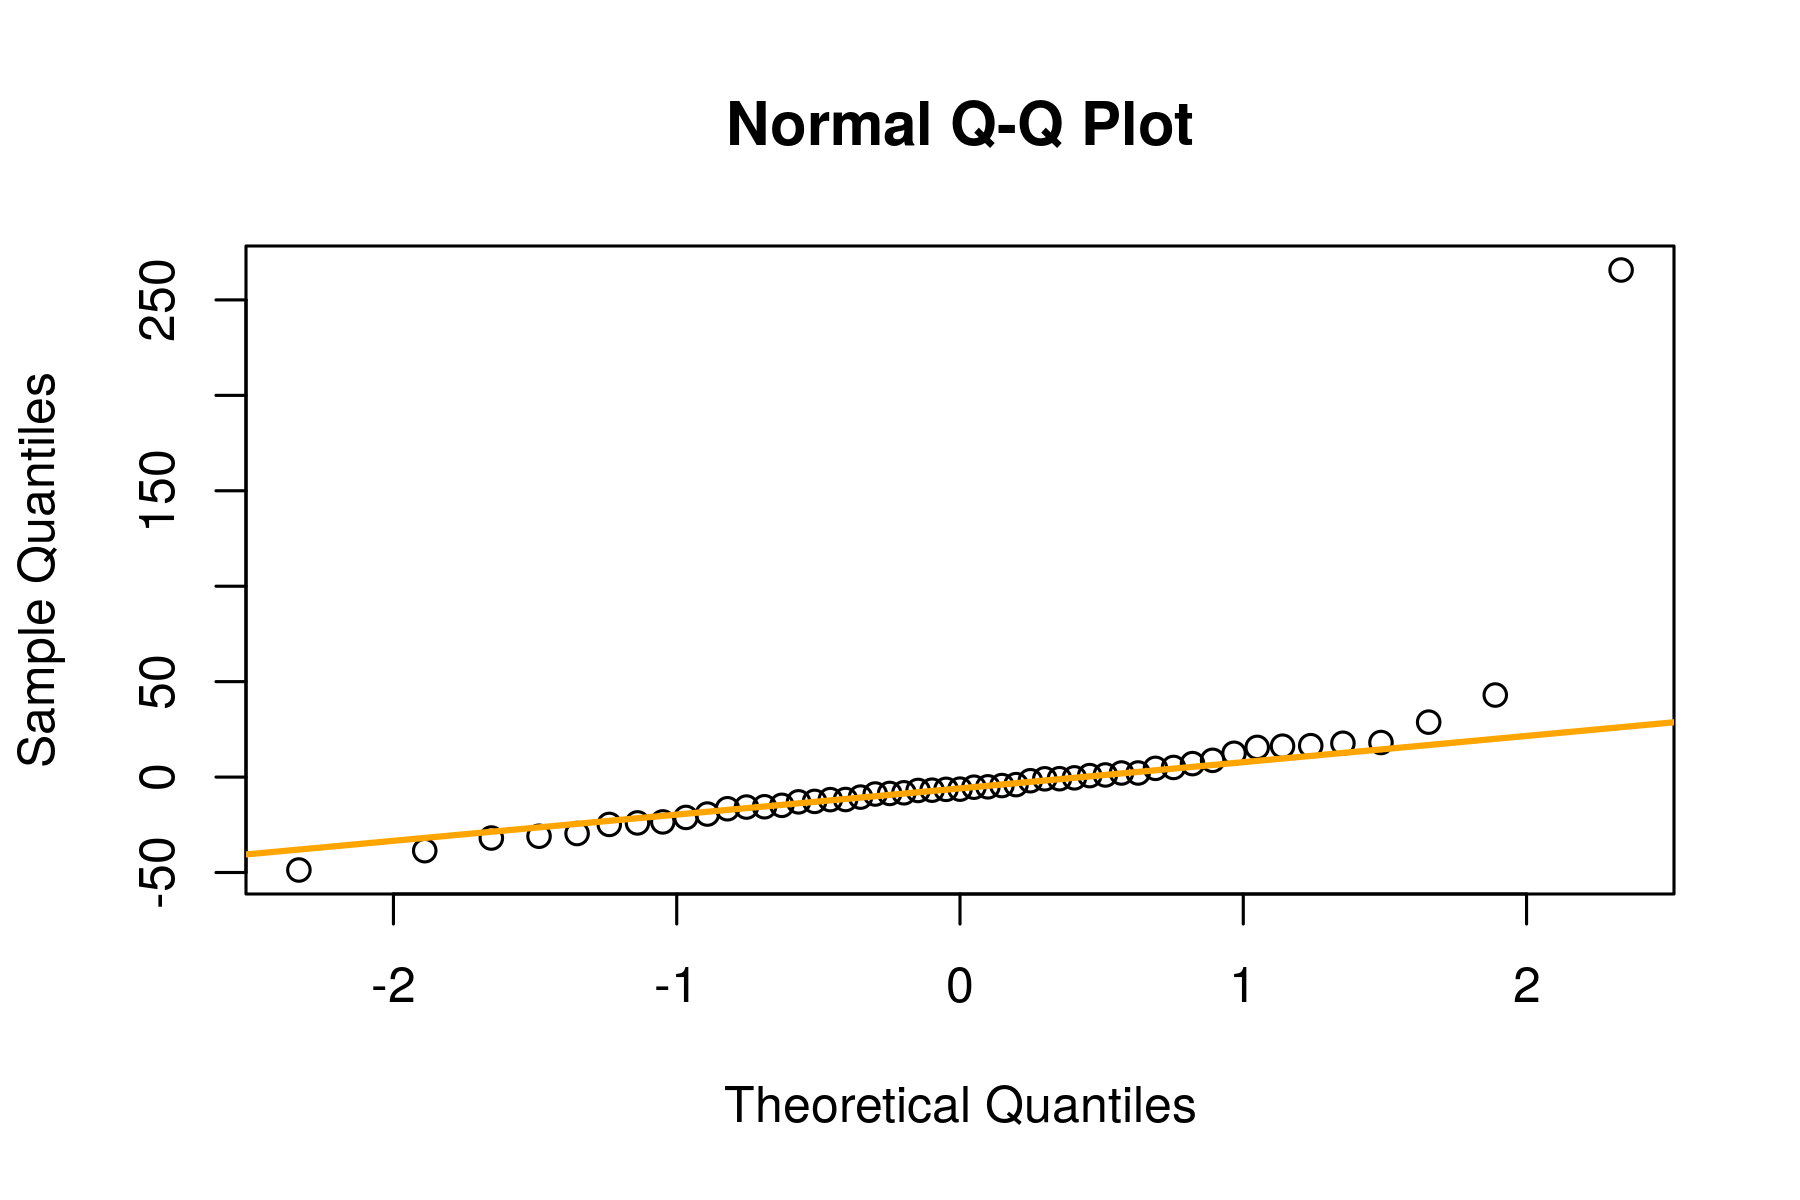

In [32]:
test_df_madrid$pe_est<-predict(new_model,test_df_madrid)
residuals <-test_df_madrid$Square.Meters-test_df_madrid$pe_est
hist(residuals, 20)
qqnorm(residuals)
qqline(residuals, col = 'orange', lwd =2)

Si tuvieramos un anuncio de un apartamento para 6 personas (Accommodates), con 1 baño, con un precio de 80€/noche y 3 habitaciones en el barrio de Sol, con 3 camas y un review de 80.
¿Cuantos metros cuadrados tendría? Si tu modelo necesita algúna variable adicional puedes inventartela dentro del rango de valores del dataset.
¿Como varía sus metros cuadrados con cada habitación adicional?

In [33]:
m2_apartamento_ejercicio <- data.frame('Accommodates' = 6,
                                       'Bathrooms' = 1,
                                       'Bedrooms' = 3,
                                       'Price' = 80,
                                       'Extra.People' = 2, 
                                       'Review.Scores.Rating'= 80,
                                       'neighb_id' = as.factor(1))
m2_apartamento_resultado <- predict(new_model, m2_apartamento_ejercicio)
paste("Según mi modelo el piso tendría: ", round(m2_apartamento_resultado,2), "m2.")

[1] "Según mi modelo el piso tendría:  81.4 m2."

Rellenar los Square.Meters con valor NA con el estimado con el modelo anterior.

In [34]:
df_madrid_na <- filter(df_madrid, is.na(df_madrid$Square.Meters)==TRUE)
df_madrid_nona <- filter(df_madrid, is.na(df_madrid$Square.Meters)==FALSE)
df_madrid_na$Square.Meters <- predict(new_model, df_madrid_na)
df_madrid <- rbind(df_madrid_na, df_madrid_nona)

Usar PCA para encontrar el apartamento más cercano a uno dado.

Este algoritmo nos ayudaría a dado un apartamento que el algoritmo nos devolvería los 5 apartamentos más similares.


Crearemos una función tal que le pasemos un apartamento con los siguientes datos:
* Accommodates	
* Bathrooms	
* Bedrooms	
* Beds	
* Price	
* Guests.Included	
* Extra.People	
* Review.Scores.Rating	
* Latitude	
* Longitude	
* Square.Meters

y nos devuelva los 5 más similares de:

In [32]:
head(df_madrid)

,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Meters,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,neighb_id
,<chr>,<int>,<dbl>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<fct>
1,Palacio,2,1,1,1,85,45.72640,1,0,95,40.41697,-3.709439,1
2,Malasaña,4,1,1,2,112,54.58296,2,5,99,40.42319,-3.711249,1
3,Palacio,8,3,3,4,190,138.96878,6,40,96,40.41651,-3.717843,1
4,La Latina,2,1,1,1,71,43.80596,1,0,90,40.41200,-3.706691,1
5,Embajadores,2,NA,1,NA,34,NA,1,6,88,40.40809,-3.700322,1
6,Embajadores,3,1,0,2,60,32.99164,1,0,100,40.41085,-3.701099,1


In [36]:
df_madrid_pca <- na.omit(df_madrid[, c('Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Square.Meters','Price', 'Guests.Included','Extra.People', 'Review.Scores.Rating', 'Latitude', 'Longitude', 'neighb_id')])
head(df_madrid_pca)

,Accommodates,Bathrooms,Bedrooms,Beds,Square.Meters,Price,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,neighb_id
,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<fct>
1,2,1,1,1,45.72640,85,1,0,95,40.41697,-3.709439,1
2,4,1,1,2,54.58296,112,2,5,99,40.42319,-3.711249,1
3,8,3,3,4,138.96878,190,6,40,96,40.41651,-3.717843,1
4,2,1,1,1,43.80596,71,1,0,90,40.41200,-3.706691,1
6,3,1,0,2,32.99164,60,1,0,100,40.41085,-3.701099,1
7,2,1,0,1,26.73145,45,1,0,87,40.40812,-3.710367,1


In [37]:
library(pracma)
pca_data <- prcomp(df_madrid_pca %>% select(-neighb_id), center = TRUE, scale. = TRUE)
head(pca_data)


Attaching package: ‘pracma’


The following objects are masked from ‘package:Matrix’:

    expm, lu, tril, triu




,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
Accommodates,0.40168981,0.070509352,0.09820122,0.113091966,-0.16609138,-0.20324375,-0.16566105,0.14640932,-0.258312122,0.78592481,-0.09520426
Bathrooms,0.35362177,-0.063832649,0.13316471,-0.217207275,0.27776141,0.29543375,0.25577916,-0.58378162,-0.428828764,-0.03078488,-0.22464845
Bedrooms,0.39506832,-0.007393335,0.14603096,-0.047697870,-0.13771221,-0.00906523,-0.28157448,-0.17721288,0.648057888,-0.11877213,-0.50640395
Beds,0.38357457,0.048044982,0.14538180,0.041195666,-0.22683096,-0.17993741,-0.32274233,0.27048355,-0.468740981,-0.58843857,0.02444385
Square.Meters,0.42424256,-0.048560628,-0.05691263,-0.050576637,0.03925393,0.12990065,-0.18078943,-0.22356480,0.253463515,0.02799245,0.80358861
Price,0.33931237,-0.020321300,0.11722667,-0.213906405,0.41028862,0.22235716,0.36029572,0.67148359,0.160593708,-0.01051899,-0.02392614
Guests.Included,0.29582280,0.097579674,-0.25903864,0.297471114,-0.22704908,-0.43846802,0.67969975,-0.11386891,0.106136428,-0.12944637,0.02433774
Extra.People,0.15400704,0.122473730,-0.69734090,0.455503474,0.25869888,0.32951764,-0.23005306,0.05846564,-0.067549171,-0.03084674,-0.17363821
Review.Scores.Rating,0.04023247,0.105522486,-0.57405909,-0.767796616,-0.13118261,-0.19786378,-0.06698203,0.02883132,-0.043282588,0.03230991,-0.05997305
Latitude,0.02294659,-0.695001886,-0.09900338,0.047479046,0.46437191,-0.51347570,-0.14969248,-0.03277516,-0.009765174,-0.01164207,-0.03712676


In [38]:
summary(pca_data)

Importance of components:
                          PC1    PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     2.2214 1.1769 1.02662 1.00098 0.82221 0.77445 0.71356
Proportion of Variance 0.4486 0.1259 0.09581 0.09109 0.06146 0.05453 0.04629
Cumulative Proportion  0.4486 0.5745 0.67034 0.76143 0.82288 0.87741 0.92370
                          PC8     PC9   PC10    PC11
Standard deviation     0.5839 0.54249 0.3796 0.24486
Proportion of Variance 0.0310 0.02675 0.0131 0.00545
Cumulative Proportion  0.9547 0.98145 0.9946 1.00000

In [40]:
Knn_test <- data.frame('Accommodates' = 6,
                                       'Bathrooms' = 1,
                                       'Bedrooms' = 3,
                                       'Beds' = 2,
                                       'Price' = 80,
                                       'Guests.Included' = 4,
                                       'Extra.People' = 2,
                                       'Review.Scores.Rating'= 80,
                                       'Latitude' = 30.42319,
                                       'Longitude' = -3.701099,
                                       'Square.Meters' = 80.72)

In [41]:
five_knn <- function(array, model, dataset){
    array_pca <- predict(model, array)
    idx <- order(rowSums((array_pca[,1:2]-model$x[,1:2])^2))
    dataset[idx %in% 1:5,]
    }

In [42]:
five_knn(Knn_test, pca_data, df_madrid_pca)

,Accommodates,Bathrooms,Bedrooms,Beds,Square.Meters,Price,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,neighb_id
,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<fct>
672,6,3,3,4,121.96183,375,1,0,92,40.41521,-3.717301,1
1443,6,2,2,2,94.04600,130,4,20,95,40.41591,-3.705965,1
1695,6,2,3,4,112.24472,99,7,30,93,40.41556,-3.700596,1
3131,4,1,1,1,52.63627,65,2,10,90,40.42997,-3.699554,1
4496,2,1,1,1,44.54475,56,1,0,95,40.42456,-3.696342,1


Bonus: ¿de todas las coordenadas PCA cual es la que mejor permite clasificar por id de barrio?

¿Por qué?

In [44]:
pca_x_neighb<-cbind(data.frame(pca_data$x),neighb_id=df_madrid_pca$neighb_id)
pca_cols<-colnames(pca_x_neighb)[1:ncol(pca_x_neighb)-1]
df_F_val<-data.frame(pca=pca_cols,F=NA)
for (idx in (1:nrow(df_F_val))){
    formula<-paste(pca_cols[idx],"~ neighb_id")
    df_F_val$F[idx]<-oneway.test(pca_x_neighb,formula = as.formula(formula))$statistic
}
df_F_val

pca,F
<chr>,<dbl>
PC1,8.311196
PC2,319.620999
PC3,0.917841
PC4,1.331857
PC5,42.246220
PC6,38.628044
PC7,21.634788
PC8,23.120988
PC9,19.781276


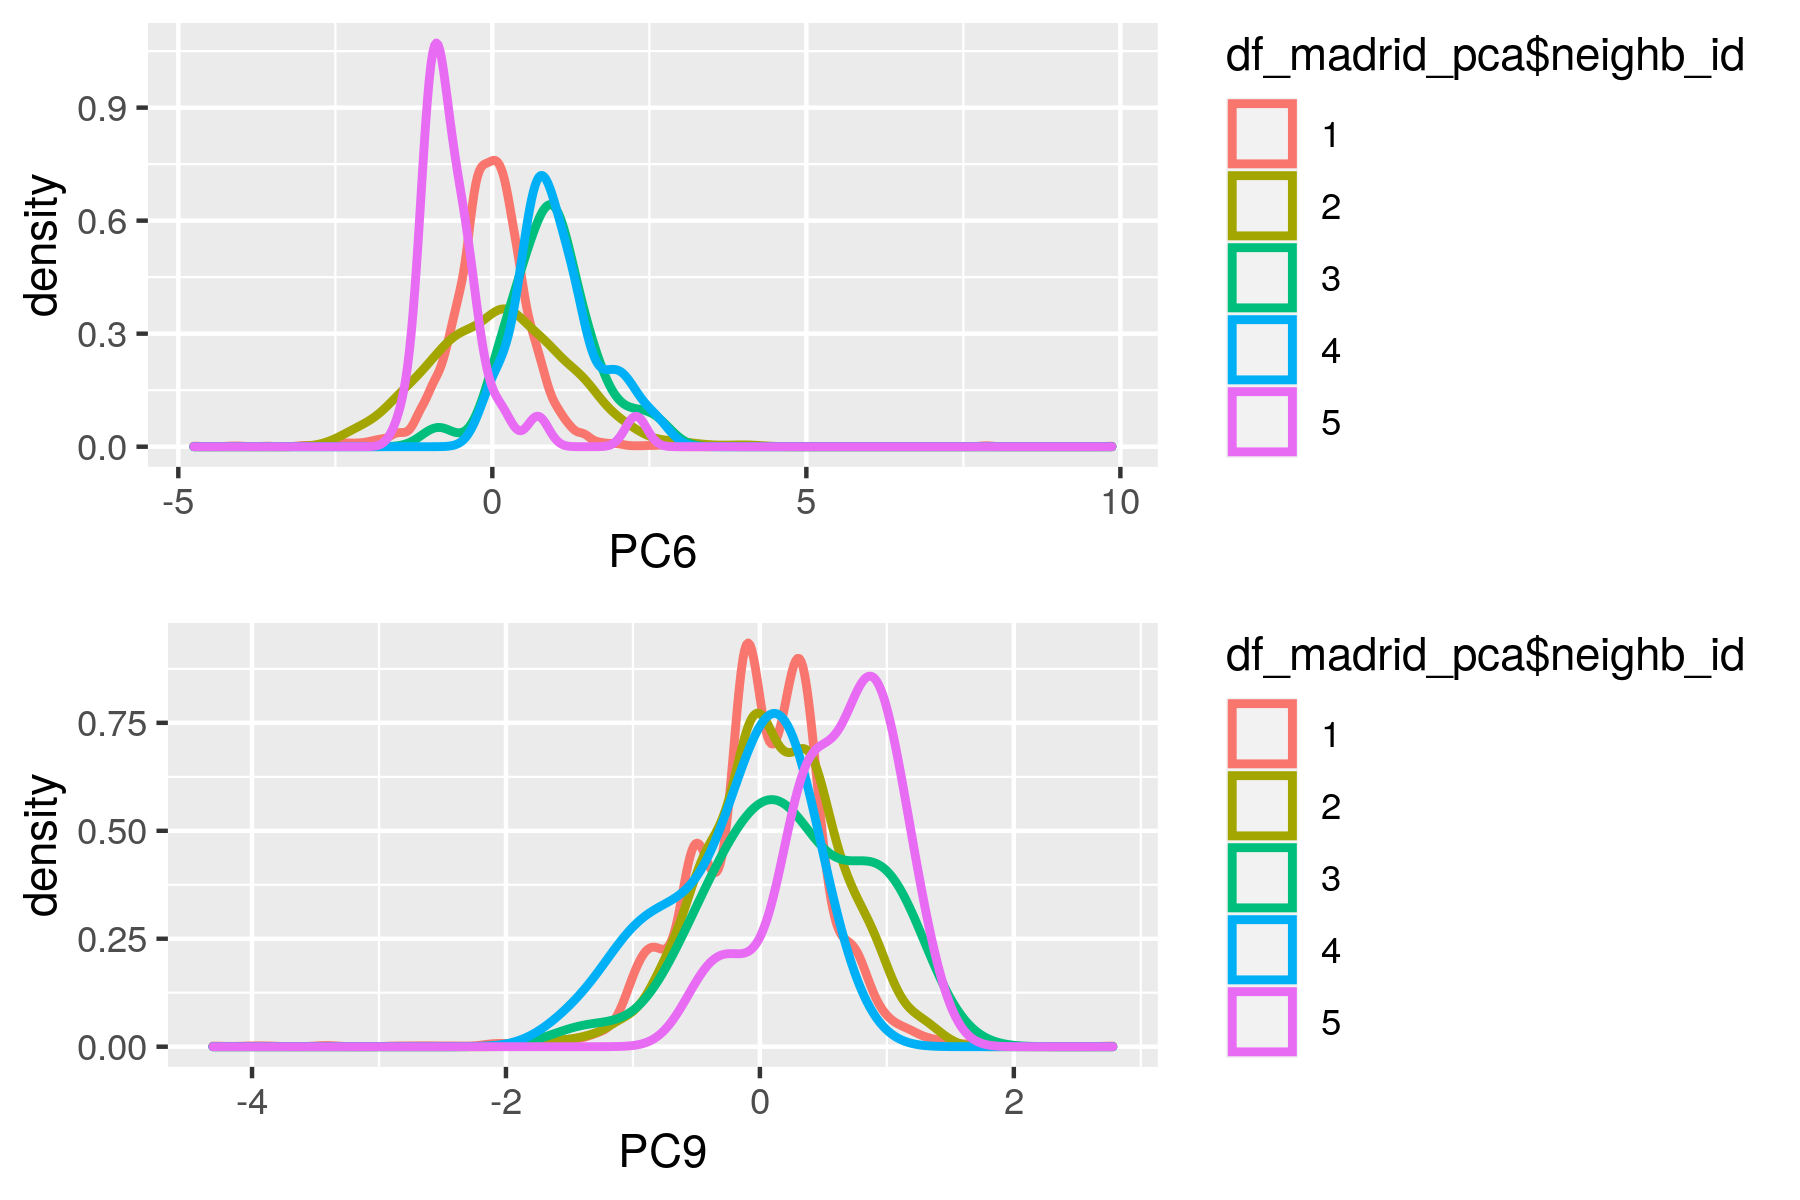

In [47]:
library(ggpubr)
g1<-ggplot(data.frame(pca_data$x),aes(x=PC6,color=df_madrid_pca$neighb_id))+geom_density(size=1)
g2<-ggplot(data.frame(pca_data$x),aes(x=PC9,color=df_madrid_pca$neighb_id))+geom_density(size=1)

ggarrange(g1,g2,ncol=1)

In [48]:
MASS::lda(formula=neighb_id~.,data=pca_x_neighb)

Call:
lda(neighb_id ~ ., data = pca_x_neighb)

Prior probabilities of groups:
          1           2           3           4           5 
0.820874134 0.158347265 0.007165035 0.006687366 0.006926200 

Group means:
          PC1        PC2          PC3          PC4         PC5         PC6
1 -0.08400862  0.2236136 -0.008652137  0.001041730  0.04373939 -0.03324432
2  0.29503056 -0.9966275  0.034487708 -0.009429223 -0.20439015  0.11147956
3  0.94991224 -1.9455583 -0.082467816  0.275726667 -1.02701737  0.93622510
4  1.30666678 -0.1790821  0.304952176 -0.409255975 -0.41665839  1.03808201
5  0.96718330 -1.5315454  0.027842034  0.202017845  0.95363218 -0.57942282
         PC7         PC8         PC9         PC10        PC11
1  0.0277359  0.03541333 -0.02303830  0.009563164 -0.04664627
2 -0.1169562 -0.14915982  0.09001827 -0.046190636  0.12529420
3 -0.1367198 -0.26752305  0.24778502 -0.015054008  1.22924335
4  0.2320117  0.14169767 -0.18381796  0.007359468  0.05767380
5 -0.6958991 -0.64705178  

Esta parte la saque de la solución de la práctica como modo pedágogico.
En mi caso que he creado 5 cluster, PC11, PC2, PC5, PC6 son las variables con más relevancia que corresponden a LD1, LD2, LD3 y LD4, respectivamente.